## $d=2$ porous convection in an inhomogeneous and anisotropic medium

$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{e}_g=-(\cos\beta\textbf{e}_x+\sin\beta\textbf{e}_y) \implies e_g^x=-\cos\beta~,~e_g^y=-\sin\beta$$

$$
\begin{align*}
\phi &= \phi(\textbf{x}) \\
\mathsf{D} &= \mathsf{I} \\ 
\mathsf{K}(\phi) &= \phi^2\begin{pmatrix}
\cos^2\vartheta +\kappa\sin^2\vartheta & (1 -  \kappa)\cos\vartheta\sin\vartheta \\
(1 -  \kappa)\cos\vartheta\sin\vartheta & \cos^2\vartheta +\kappa\sin^2\vartheta\\
 \end{pmatrix}\\ 
\mu &= 1 \\
\rho(c) &= c
\end{align*}
$$

$$c_0(x,y)=\frac{1}{2}\left(1+\text{erf}\left(\frac{y-L_y}{\epsilon L_y}\right)\right)+\mathcal{N}(x,y)$$

$$c(x,y=L_y)=1$$

$$\frac{\partial c}{\partial x}\bigg\vert_{x=0,y}=\frac{\partial c}{\partial x}\bigg\vert_{x=L_x,y}=\frac{\partial c}{\partial y}\bigg\vert_{x,y=0}=0$$

$$\textbf{n}\cdot\textbf{u}|_{\partial\Omega}=0\implies\psi\vert_{\partial\Omega}=0$$

The following notebooks will create their `Simulation` objects using the general-purpose function `porous_convection_anisotropic_rectangle` defined in `demo/py/porous_convection_anisotropic.py`, which itself calls the more general `porous_convection_simulation` function defined in `demo/py/porous_convection.py`.

### Example: uniform porosity and isotropic permeability

$$\beta=0$$
$$\phi=1$$
$$\kappa = 1$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.porous_convection_anisotropic import porous_convection_anisotropic_rectangle


simulation = porous_convection_anisotropic_rectangle(
    Lx=2.0,
    Ly=1.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=500.0, 
    kappa=1.0,
    c_eps=1e-4, 
    c_freq=(14, 14), 
    c_seed=(456, 987), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 100
dt_init = 1e-6
n_init = 5
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

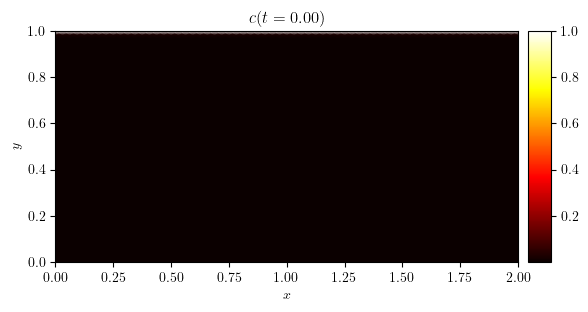

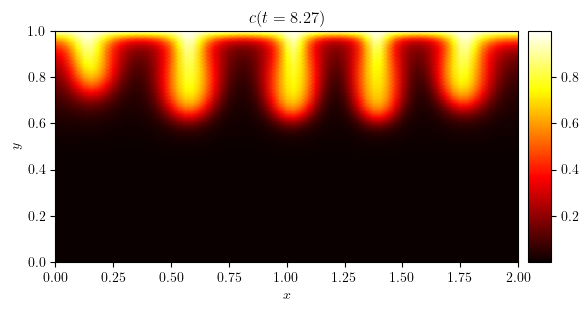

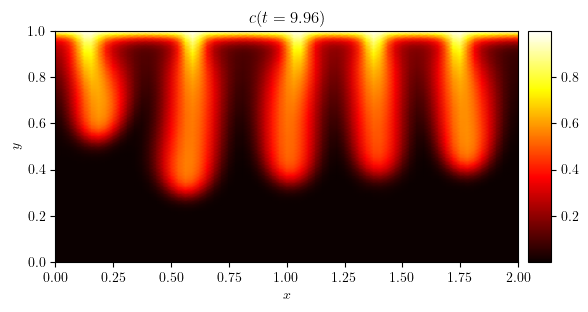

: 

In [ ]:
c = simulation['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(
        fig, 
        f'A16a_porous_convection_isotropic_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'], 
        close=False, 
        pickle=False,
    )